In [7]:
#Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Import and cleaning listings data, load as pandas dataframe

In [2]:


listing_data = pd.read_csv('\\Users\\cofos\\Downloads\\listings (1).csv')
listing_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,575,2,0,NaN,NaN,1,365


In [3]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24079 entries, 0 to 24078
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24079 non-null  int64  
 1   name                            24079 non-null  object 
 2   host_id                         24079 non-null  int64  
 3   host_name                       24076 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24079 non-null  object 
 6   latitude                        24079 non-null  float64
 7   longitude                       24079 non-null  float64
 8   room_type                       24079 non-null  object 
 9   price                           24079 non-null  int64  
 10  minimum_nights                  24079 non-null  int64  
 11  number_of_reviews               24079 non-null  int64  
 12  last_review                     

In [6]:
listing_data['price'].dtype

dtype('int64')

In [8]:
listing_2 = pd.read_csv('\\Users\\cofos\\Downloads\\listings (1).csv')
listing_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,575,2,0,NaN,NaN,1,365


In [10]:
listing_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24079 entries, 0 to 24078
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24079 non-null  int64  
 1   name                            24079 non-null  object 
 2   host_id                         24079 non-null  int64  
 3   host_name                       24076 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24079 non-null  object 
 6   latitude                        24079 non-null  float64
 7   longitude                       24079 non-null  float64
 8   room_type                       24079 non-null  object 
 9   price                           24079 non-null  int64  
 10  minimum_nights                  24079 non-null  int64  
 11  number_of_reviews               24079 non-null  int64  
 12  last_review                     

In [26]:
# Categorizing differernt mean price based on room_type
type_of_room = listing_2.groupby(['room_type']).price.mean().reset_index()
type_of_room

,room_type,price
0,Entire home/apt,2881.534116
1,Hotel room,2287.154412
2,Private room,1059.597928
3,Shared room,1657.101449


In [27]:
type(type_of_room)

pandas.core.frame.DataFrame

In [17]:
# Categorizing differernt listing based on room_type
listing_2.rename(columns={'id':'listings'}, inplace=True)
number_listing_per_room = listing_2.groupby(['room_type']).listings.count().reset_index()
number_listing_per_room

,room_type,listings
0,Entire home/apt,18320
1,Hotel room,408
2,Private room,5213
3,Shared room,138


In [23]:
type(number_listing_per_room)

pandas.core.frame.DataFrame

In [29]:
#Merging the number_lisitng_per room table with type_of_ room table
room_types = type_of_room.merge(number_listing_per_room, on ='room_type')
room_types

,room_type,price,listings
0,Entire home/apt,2881.534116,18320
1,Hotel room,2287.154412,408
2,Private room,1059.597928,5213
3,Shared room,1657.101449,138


In [30]:
Reviews_per_room_type = listing_2.groupby('room_type').number_of_reviews.sum().reset_index()

In [33]:
#merging the room_types with reviewa_per_room_type
room_types = room_types.merge(Reviews_per_room_type, on ='room_type')
room_types

,room_type,price,listings,number_of_reviews_x,number_of_reviews_y
0,Entire home/apt,2881.534116,18320,302288,302288
1,Hotel room,2287.154412,408,1800,1800
2,Private room,1059.597928,5213,44700,44700
3,Shared room,1657.101449,138,350,350


In [36]:
room_types.drop('number_of_reviews_y', axis=1, inplace = True)

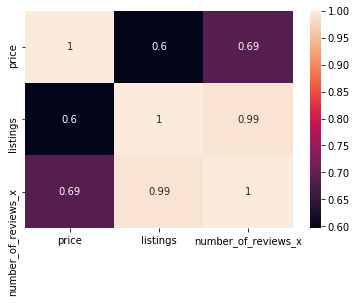

In [37]:
corrMatrix = room_types.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [42]:
#Categorizing differernt mean price,listing,reviews based on neighbourhood
price_on_neighbourhood = listing_2.groupby('neighbourhood').price.mean().reset_index()
price_on_neighbourhood = price_on_neighbourhood.sort_values(by = 'price',  ascending=False)
price_on_neighbourhood.head()


,neighbourhood,price
8,Ward 106,144793.000000
93,Ward 92,37298.800000
83,Ward 79,9494.000000
56,Ward 54,6018.903907
65,Ward 62,4718.753070


In [46]:
top_listing_neighbourhood = listing_2.groupby('neighbourhood').listings.count().reset_index()
top_listing_neighbourhood 

,neighbourhood,listings
0,Ward 1,234
1,Ward 10,32
2,Ward 100,392
3,Ward 101,1
4,Ward 102,62
...,...,...
94,Ward 93,3
95,Ward 94,8
96,Ward 96,2
97,Ward 98,1


In [49]:
top_review_neighbourhood = listing_2.groupby('neighbourhood').number_of_reviews.sum().reset_index()
top_review_neighbourhood


,neighbourhood,number_of_reviews
0,Ward 1,1066
1,Ward 10,94
2,Ward 100,2249
3,Ward 101,0
4,Ward 102,310
...,...,...
94,Ward 93,4
95,Ward 94,36
96,Ward 96,1
97,Ward 98,0


In [54]:
neighbourhood_table = price_on_neighbourhood.merge(top_listing_neighbourhood, on = 'neighbourhood') 
neighbourhood_table.head()

,neighbourhood,price,listings
0,Ward 106,144793.000000,1
1,Ward 92,37298.800000,5
2,Ward 79,9494.000000,1
3,Ward 54,6018.903907,3174
4,Ward 62,4718.753070,733


In [56]:
neighbourhood_table = neighbourhood_table.merge(top_review_neighbourhood, on = 'neighbourhood')
neighbourhood_table


,neighbourhood,price,listings,number_of_reviews_x,number_of_reviews_y
0,Ward 106,144793.000000,1,0,0
1,Ward 92,37298.800000,5,6,6
2,Ward 79,9494.000000,1,0,0
3,Ward 54,6018.903907,3174,56401,56401
4,Ward 62,4718.753070,733,7659,7659
...,...,...,...,...,...
94,Ward 99,348.000000,1,0,0
95,Ward 12,338.800000,5,6,6
96,Ward 93,316.333333,3,4,4
97,Ward 98,299.000000,1,0,0
